In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('post-natal-data.csv')

df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
df = df.drop('Timestamp', axis=1)
df.rename(columns={'Feeling anxious': 'target'}, inplace=True)

df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,target,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
for column in df.columns:
  print(f"Column: {column}, Values: {df[column].unique()}")

Column: Age, Values: ['35-40' '40-45' '30-35' '45-50' '25-30']
Column: Feeling sad or Tearful, Values: ['Yes' 'No' 'Sometimes']
Column: Irritable towards baby & partner, Values: ['Yes' 'No' 'Sometimes' nan]
Column: Trouble sleeping at night, Values: ['Two or more days a week' 'No' 'Yes']
Column: Problems concentrating or making decision, Values: ['Yes' 'No' 'Often' nan]
Column: Overeating or loss of appetite, Values: ['Yes' 'No' 'Not at all']
Column: target, Values: ['Yes' 'No']
Column: Feeling of guilt, Values: ['No' 'Yes' 'Maybe' nan]
Column: Problems of bonding with baby, Values: ['Yes' 'Sometimes' 'No']
Column: Suicide attempt, Values: ['Yes' 'No' 'Not interested to say']


# Encoding the values

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Assuming df is your DataFrame with all columns as categorical data except 'Age'
# We will encode all columns except 'Age'
encoded_df = df.copy()  # Create a copy to avoid changing the original DataFrame

for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':  # Only encode non-numeric columns
        encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Now encoded_df contains all the categorical variables encoded, and can be used with RandomForest
encoded_df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,target,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2,2,2,1,2,2,1,1,2,2
1,3,2,0,0,2,2,0,2,2,0
2,2,2,0,2,2,2,1,1,1,0
3,2,2,2,2,2,0,1,0,0,0
4,3,2,0,1,2,0,1,1,2,0


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare your data
X = encoded_df.drop('target', axis=1)
y = encoded_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
# n-estimators are the number of trees used
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        95
           1       0.99      0.97      0.98       206

    accuracy                           0.97       301
   macro avg       0.96      0.97      0.97       301
weighted avg       0.97      0.97      0.97       301



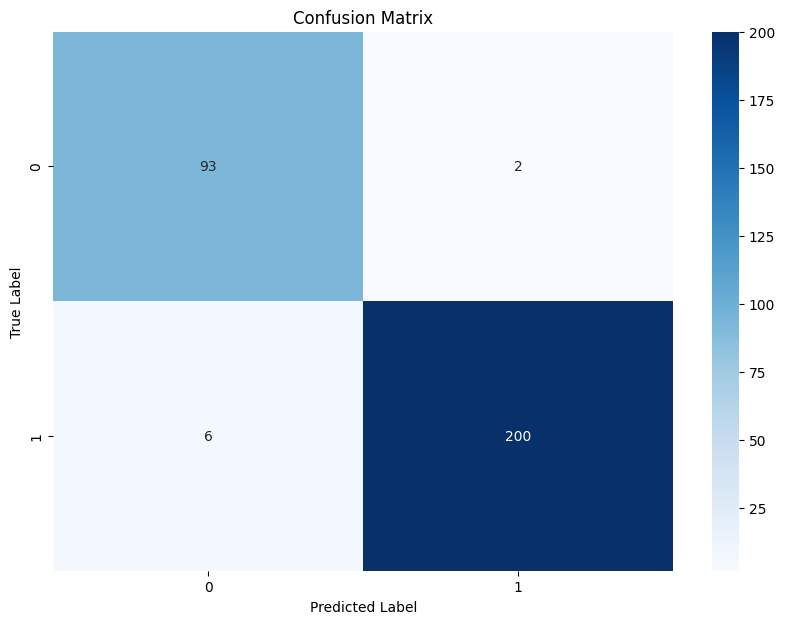

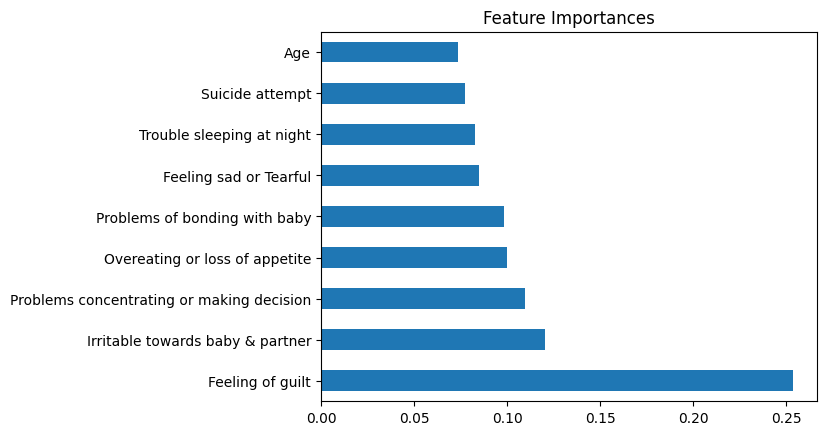

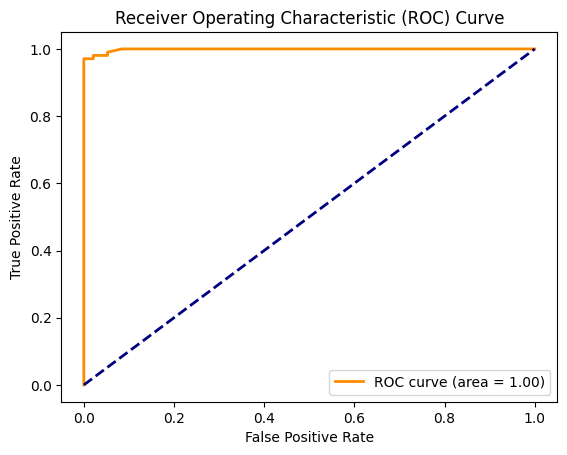

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Feature importance graph
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')  # Plot top 10 features
plt.title('Feature Importances')
plt.show()

# ROC Curve (if binary classification)
if len(y.unique()) == 2:
    from sklearn.metrics import roc_curve, auc

    # Calculate false positive rates and true positive rates
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Support Vector Machine

Accuracy: 0.74
Precision: 0.73
Recall: 0.74
F1 Score: 0.73


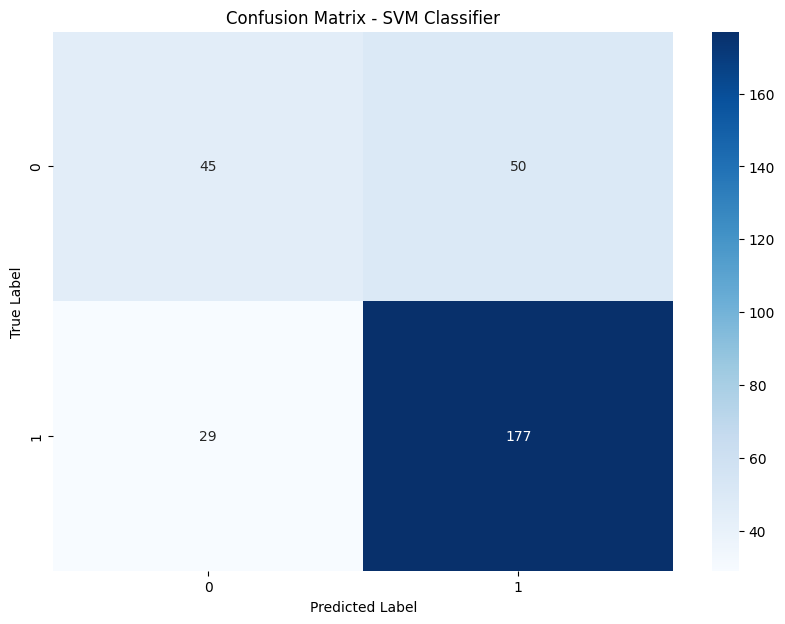

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare your data
# Assuming encoded_df is your encoded DataFrame
X = encoded_df.drop('target', axis=1)
y = encoded_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM Classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

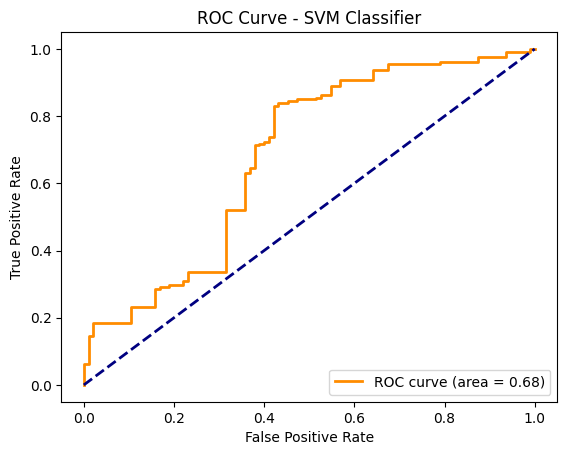

In [ ]:
if len(y.unique()) == 2:  # Check if the problem is binary classification
    from sklearn.metrics import roc_curve, auc

    # Get probabilities for the positive class
    y_scores = svm_clf.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - SVM Classifier')
    plt.legend(loc="lower right")
    plt.show()

# Logistc regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare your data
# Assuming encoded_df is your encoded DataFrame
X = encoded_df.drop('target', axis=1)
y = encoded_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression Classifier
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.74
Precision: 0.73
Recall: 0.74
F1 Score: 0.73


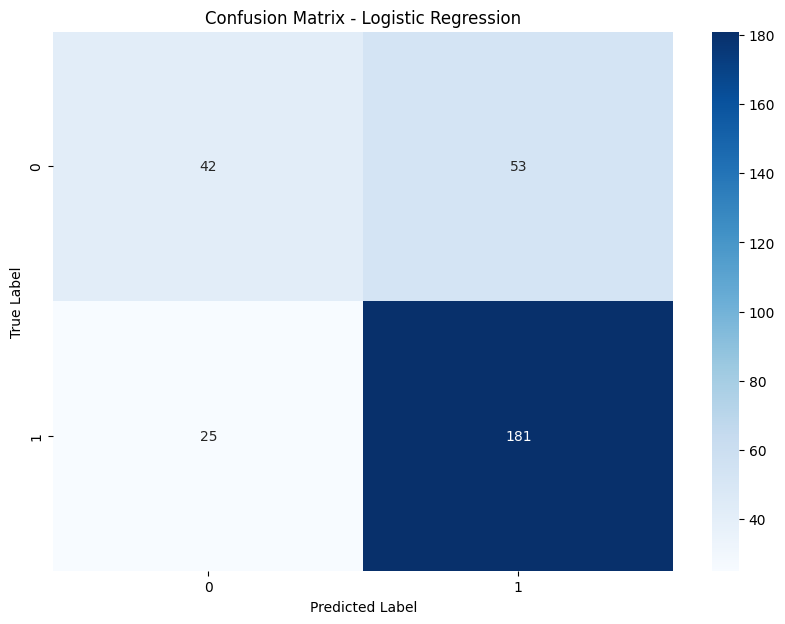

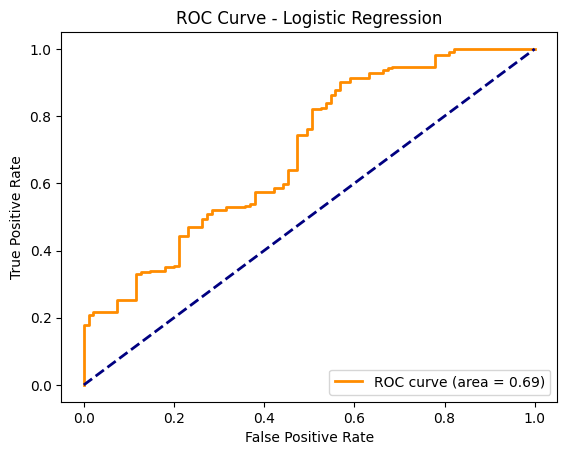

In [ ]:
# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC Curve (if binary classification)
if len(y.unique()) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from joblib import dump

# Save the Logistic Regression model
dump(log_reg, 'logistic_regression_model.joblib')

# Save the SVM model
dump(svm_clf, 'svm_classifier_model.joblib')

# Save the Random Forest model
dump(clf, 'random_forest_classifier_model.joblib')

# Save the encoders
dump(label_encoder, 'post-partum-encoder.joblib')

['post-partum-encoder.joblib']

In [41]:
from joblib import load

# Load the Logistic Regression model
log_reg = load('logistic_regression_model.joblib')

# Load the SVM model
svm_clf = load('svm_classifier_model.joblib')

# Load the Random Forest model
clf = load('random_forest_classifier_model.joblib')

# Load the encoders
encoder = load('post-partum-encoder.joblib')